In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [97]:
def padding(g):
    M, N = g.shape
    m = max(M,N)
    a = int(np.log2(m)+1)
    A = 2**a
    t = np.zeros((A,A))
    t[int(A/2-M/2) : int(A/2+M/2), int(A/2-N/2) : int(A/2+N/2)] = g[:,:]
    t = t/np.max(t)
    return t

In [127]:
def fresnel(g, lambda_=1e-9, d=1):
    M, N = g.shape
    dxs = np.sqrt(lambda_ * d / M)
    dys = np.sqrt(lambda_ * d / N)
    xs = dxs * np.array(range(-int(M/2),+int(M/2)))
    ys = dys * np.array(range(-int(N/2),+int(N/2)))
    Ys, Xs = np.meshgrid(ys, xs)
    
    dx, dy = dxs, dys
    x, y = xs, ys
    Y, X = np.meshgrid(y, x)

    # random noise
    # g = g * 2 * np.pi * np.random.rand(M, N)
    
    g = g * np.exp(1j * np.pi / lambda_ / d * (Xs**2 + Ys**2))

    g = np.fft.fftshift(g)
    g = np.fft.fft2(g)
    g = np.fft.fftshift(g)

    g = g * (1 / 1j / lambda_ / d) * np.exp(1j * 2 * np.pi * d / lambda_) \
          * np.exp(1j * np.pi / lambda_ / d * (X**2 +Y**2))
    
    # regularization
    g = g / np.max(np.abs(g))
    return g
    
    

In [56]:
def plane_wave(g, theta=np.pi/18, lambda_=1e-9, d=1):
    M, N = g.shape
    dx = np.sqrt(lambda_ * d / M)
    dy = np.sqrt(lambda_ * d / N)
    x = dx * np.array(range(-int(M/2),+int(M/2)))
    y = dy * np.array(range(-int(N/2),+int(N/2)))
    Y, X = np.meshgrid(y, x)
    
    return np.exp(1j * 2 * np.pi / lambda_ * X * np.sin(theta))

In [158]:
def record(g, r):
    holo = np.square(np.abs(g + r))
    return holo

In [163]:
def reconstruct(holo, p):
    holo = holo - np.mean(holo)
    rec = fresnel(holo * p)
    return rec

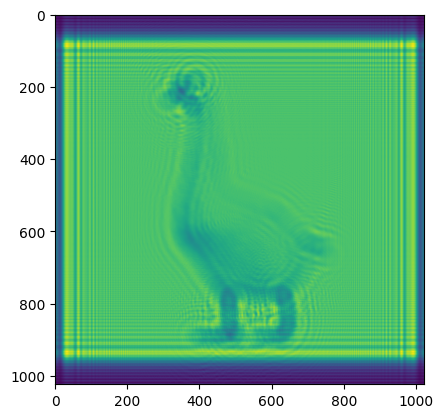

In [166]:
img_path = "/Users/makisbea/Labs/Computer-Generated-Hologram/Images/goose.jpg"
# img_path = "/Users/makisbea/Labs/Computer-Generated-Hologram/Res/imageO/pku.jpg"
img = Image.open(img_path)
img = img.convert('L')
g = np.array(img)
g = padding(g)
g = fresnel(g)
plt.imshow(np.abs(g))

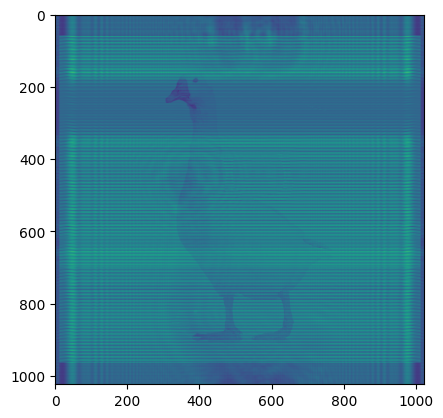

In [173]:
r = plane_wave(g, theta=np.pi/10)
holo = record(g, r)

p = plane_wave(g, theta=-np.pi/10)
recon = reconstruct(holo, p)

plt.imshow(np.abs(recon))

/var/folders/dc/7gb_kngn7ns6kv_25lb1_nhm0000gq/T/ipykernel_756/1771211562.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  t[int(M/2):int((3*M)/2), int(N/2):int((3*N)/2)] = recon[:,:]


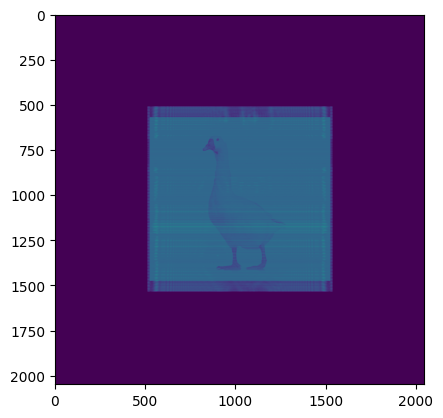

In [174]:
M, N = g.shape
t = np.zeros((2*M, 2*N))
t[int(M/2):int((3*M)/2), int(N/2):int((3*N)/2)] = recon[:,:]
plt.imshow(np.abs(t))